In [12]:
import pandas as pd
orders = pd.read_csv('orders.txt')
products = pd.read_csv('prodcuts.txt')
customers = pd.read_csv('customers.txt')
display(orders)
display(products)
display(customers)

,order_id,customer_id,product_id,quantity,timestamp
0,1,2,3,1,2017-01-01
1,2,2,2,3,2017-01-01
2,3,3,1,1,2017-01-01
3,4,3,2,2,2017-02-01
4,5,3,3,3,2017-02-01
5,6,1,4,2,2017-03-01
6,7,1,1,1,2017-02-02
7,8,1,4,1,2017-02-02


,product_id,description,price
0,1,thing-a-ma-jig,5
1,2,whatcha-ma-call-it,10
2,3,doo-hickey,7
3,4,gizmo,3


,customer_id,customer_name,address,phone_number
0,1,John Smith,123 Main St.,212-123-4567
1,2,Jane Doe,456 Park Ave.,949-867-5309
2,3,Joe Schmo,798 Broadway,112-358-1321


Inner Merge I

The .merge method looks for columns that are common between two DataFrames and then looks for rows where those column’s values are the same. It then combines the matching rows into a single row in a new table.

In [13]:
sales = pd.read_csv('sales.txt')
print(sales)
targets = pd.read_csv('targets.txt')
print(targets)


      month  revenue
0   January      300
1  February      290
2     March      310
3     April      325
4       May      475
5      June      495
      month  target
0   January     310
1  February     270
2     March     300
3     April     350
4       May     475
5      June     500


In [20]:
sales_vs_targets = pd.merge(sales,targets)
display(new_df)

,month,revenue,target
0,January,300,310
1,February,290,270
2,March,310,300
3,April,325,350
4,May,475,475
5,June,495,500


Select the rows from sales_vs_targets where revenue is greater than target. Save these rows to the variable crushing_it.

In [22]:
crushing_it=sales_vs_targets[sales_vs_targets.revenue>sales_vs_targets.target]
display(crushing_it)

,month,revenue,target
1,February,290,270
2,March,310,300


In [27]:
men_women = pd.read_csv("men_women.txt")

all_data = sales.merge(targets).merge(men_women)

display(all_data)

results = all_data[(all_data.revenue > all_data.target) & (all_data.women > all_data.men)]
display(results)

,month,revenue,target,men,women
0,January,300,310,30,35
1,February,290,270,29,35
2,March,310,300,31,29
3,April,325,350,32,28
4,May,475,475,47,50
5,June,495,500,49,45


,month,revenue,target,men,women
1,February,290,270,29,35


## Merge on Specific Columns
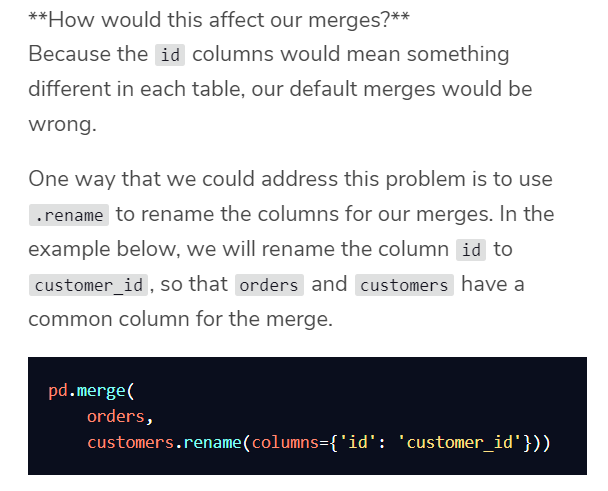 | 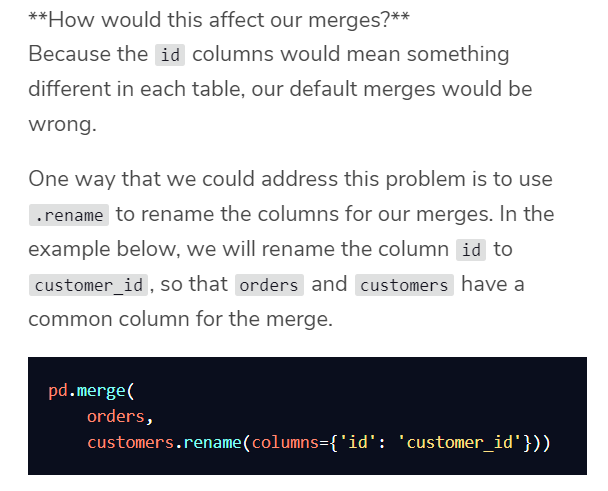

<table><tr>
<td> 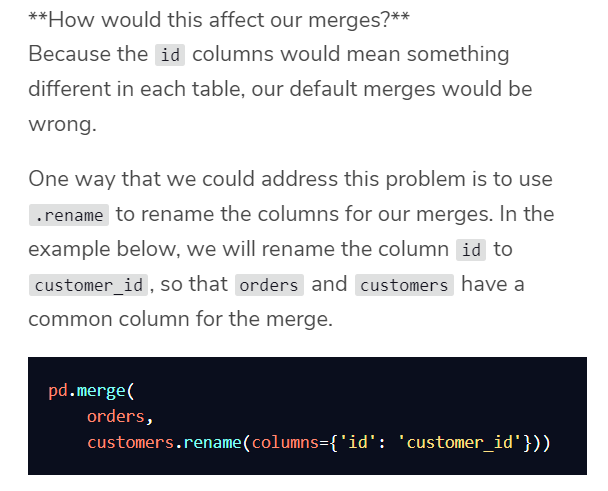 </td>
<td> 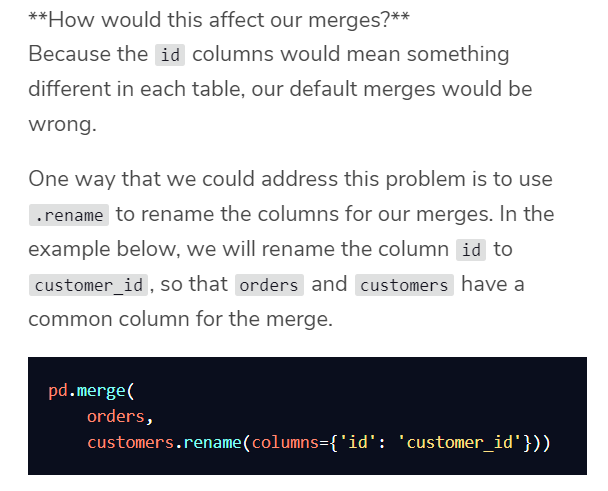 </td>
</tr></table>



In [33]:
orders_products = pd.merge(
	orders,
	products.rename(columns={'id':'product_id'})
)
display(orders)
display(products)
display(orders_products)

,order_id,customer_id,product_id,quantity,timestamp
0,1,2,3,1,2017-01-01
1,2,2,2,3,2017-01-01
2,3,3,1,1,2017-01-01
3,4,3,2,2,2017-02-01
4,5,3,3,3,2017-02-01
5,6,1,4,2,2017-03-01
6,7,1,1,1,2017-02-02
7,8,1,4,1,2017-02-02


,product_id,description,price
0,1,thing-a-ma-jig,5
1,2,whatcha-ma-call-it,10
2,3,doo-hickey,7
3,4,gizmo,3


,order_id,customer_id,product_id,quantity,timestamp,description,price
0,1,2,3,1,2017-01-01,doo-hickey,7
1,5,3,3,3,2017-02-01,doo-hickey,7
2,2,2,2,3,2017-01-01,whatcha-ma-call-it,10
3,4,3,2,2,2017-02-01,whatcha-ma-call-it,10
4,3,3,1,1,2017-01-01,thing-a-ma-jig,5
5,7,1,1,1,2017-02-02,thing-a-ma-jig,5
6,6,1,4,2,2017-03-01,gizmo,3
7,8,1,4,1,2017-02-02,gizmo,3


### Merge on Specific Columns (LEFT RIGHT JOIN)
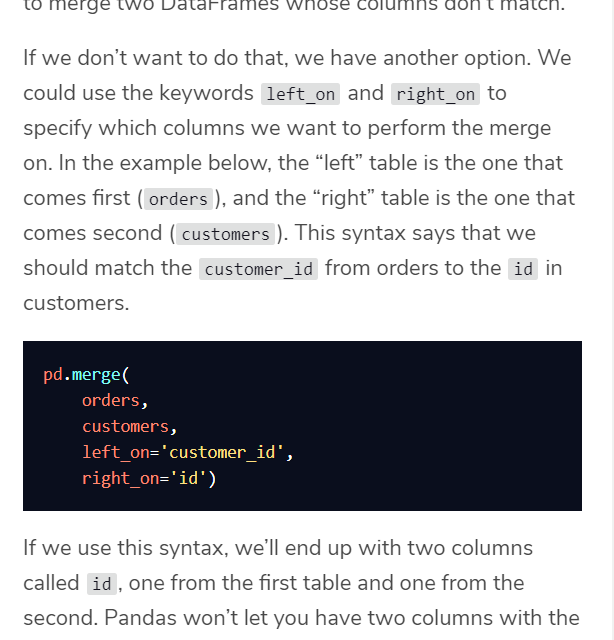

In [45]:
orders = pd.read_csv('orders.txt')
display(orders)
products = pd.read_csv('products.txt')
display(products)
orders_products = pd.merge(
  orders,
  products,
  left_on='product_id',
  right_on='product_id',
  suffixes=['_orders','_products']
)

display(orders_products)

,order_id,customer_id,product_id,quantity,timestamp
0,1,2,3,1,2017-01-01
1,2,2,2,3,2017-01-01
2,3,3,1,1,2017-01-01
3,4,3,2,2,2017-02-01
4,5,3,3,3,2017-02-01
5,6,1,4,2,2017-03-01
6,7,1,1,1,2017-02-02
7,8,1,4,1,2017-02-02


,product_id,description,price
0,1,thing-a-ma-jig,5
1,2,whatcha-ma-call-it,10
2,3,doo-hickey,7
3,4,gizmo,3


,order_id,customer_id,product_id,quantity,timestamp,description,price
0,1,2,3,1,2017-01-01,doo-hickey,7
1,5,3,3,3,2017-02-01,doo-hickey,7
2,2,2,2,3,2017-01-01,whatcha-ma-call-it,10
3,4,3,2,2,2017-02-01,whatcha-ma-call-it,10
4,3,3,1,1,2017-01-01,thing-a-ma-jig,5
5,7,1,1,1,2017-02-02,thing-a-ma-jig,5
6,6,1,4,2,2017-03-01,gizmo,3
7,8,1,4,1,2017-02-02,gizmo,3


### Concate Data Frames
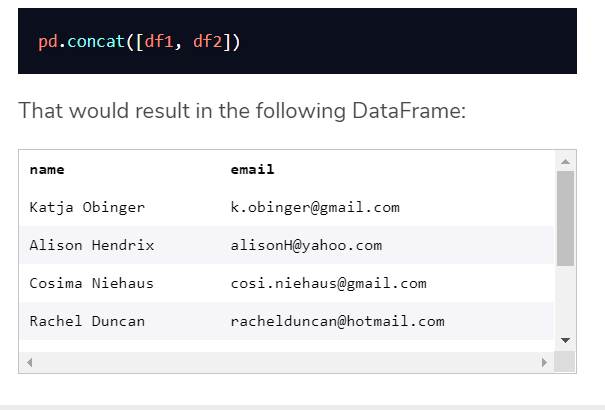

In [47]:
bakery = pd.read_csv('bakery.txt')
print(bakery)
ice_cream = pd.read_csv('ice_cream.txt')
print(ice_cream)

menu = pd.concat([bakery,ice_cream])
display(menu)

                  item  price
0               cookie   2.50
1              brownie   3.50
2        slice of cake   4.75
3  slice of cheesecake   4.75
4         slice of pie   5.00
                              item  price
0     scoop of chocolate ice cream   3.00
1       scoop of vanilla ice cream   2.95
2    scoop of strawberry ice cream   3.05
3  scoop of cookie dough ice cream   3.25


,item,price
0,cookie,2.50
1,brownie,3.50
2,slice of cake,4.75
3,slice of cheesecake,4.75
4,slice of pie,5.00
0,scoop of chocolate ice cream,3.00
1,scoop of vanilla ice cream,2.95
2,scoop of strawberry ice cream,3.05
3,scoop of cookie dough ice cream,3.25
